# World Happiness Report

This case study is based on the [7th World Happiness Report](https://worldhappiness.report/ed/2019/). The first was released in April 2012 in support of a UN High level meeting on “Wellbeing and Happiness: Defining a New Economic Paradigm”. That 2012 report presented the available global data on national happiness and reviewed related evidence from the emerging science of happiness, showing that the quality of people’s lives can be coherently, reliably, and validly assessed by a variety of subjective well-being measures, collectively referred to then and in subsequent reports as “happiness.” 

This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

I have downloaded the data from [Chapter 2: Online Data](https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls) and filtered out data prior to 2018. The result is available in CSV format, as the file `happiness-report.csv`. _Data Prep Notes:_ The Happiness Score column is from Figure 2.6 in the downloaded report; the other data columns are from Table 2.1 in the same report. If a country wasn't in either list, it wasn't included in the CSV file.

### 1. Validate the data

Even though you are given the downloaded data in `happiness-report.csv`, use the description in the last paragraph to repeat the procedure. Do you get the same results? 

In [1]:
# Execute this cell to compare
!comm -3 happiness-report.csv happiness-report-your-copy.csv

comm: happiness-report-your-copy.csv: No such file or directory


Did you get the same result?

**Explain:**

**Irrespective of your answer, use `happiness-report.csv` for the remainder of this notebook.**

In [2]:
import pandas as pd
data1 = pd.read_csv('happiness-report.csv')
data1

,Country,Year,HappinessScore,LifeLadder,LogGDP,SocialSupport,HealthyLifeExpectancyAtBirth,FreedomToMakeLifeChoices,Generosity,PerceptionsOfCorruption,PositiveAffect,NegativeAffect,ConfidenceInNationalGovernment
0,Afghanistan,2018,3.203,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666
1,Albania,2018,4.719,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338
2,Algeria,2018,5.211,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,NaN
3,Argentina,2018,6.086,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352
4,Armenia,2018,4.559,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Venezuela,2018,4.707,5.005663,9.270281,0.886882,66.500000,0.610855,-0.176156,0.827560,0.759221,0.373658,0.260700
132,Vietnam,2018,5.175,5.295547,8.783416,0.831945,67.900002,0.909260,-0.039124,0.808423,0.692222,0.191061,NaN
133,Yemen,2018,3.380,3.057514,NaN,0.789422,56.700001,0.552726,NaN,0.792587,0.461114,0.314870,0.308151
134,Zambia,2018,4.107,4.041488,8.223958,0.717720,55.299999,0.790626,0.036644,0.810731,0.702698,0.350963,0.606715


### 2. Copy the header from the dataframe &hellip;

&hellip; and obtain column names for the first 7 columns.

In [ ]:
colnames = # ...fill in...
colnames

### 3. Create a new dataframe `data2` with just the first 7 columns.

In [ ]:
data2 = # ...fill in...
data2

### 4. Drop invalid rows

Look up the pandas method `dropna` and use it to create a new dataframe `data3` with cleaned up data.

In [ ]:
data3 # ...fill in...
data3

### 5. Drop a Column

Create a new dataframe `data4` that is the same as `data3` but with the **LifeLadder** column dropped.

In [ ]:
data4 = data3 # ...fill in...
data4

### 6. From `data4`, show the row for United States

The Dataframe outputs in the cells above didn't show US and you don't know if the country is called 'USA' or 'United States' or 'United States of America' or something else. _You could look at the underlying file but that isn't the point of this question. The point is to be able to search for things in the dataframe._

In [ ]:
# Fill in

### 7. Change a Row

Hypothetical scenario: _Belarus_ decides to officially change its name to _Belarussian Republic_ and its happiness score increases by 5%. Copy data4 into data5 and make these changes to data5. Show all rows in data5 that match the substring `russia` (ignoring case, so both Russia and Belarussian Republic would be shown).

In [ ]:
data5 = data4
# Fill in

### 8. Using our data set

We are curious what happens when we split our data between countries where \\((HappinessScore \leq  5 \\)). We want to see if there is any significance between these 2 groups. Loop through all columns that you think are important and decide the best split by the column with the largest squared difference between the mean of the 2 categories in that column.

We have provided a ploting function that you can use to visualize your results


In [161]:
import matplotlib.pyplot as plt

def plot(data_less_than_5, data_greater_than_5):
    plt.hist((data_less_than_5, data_greater_than_5), 100)
    plt.show()

100.54400402917958
HealthyLifeExpectancyAtBirth


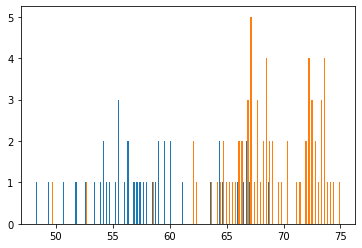

In [162]:
import matplotlib.pyplot as plt
import numpy as np

data1 = data1.dropna()

possib = ["LifeLadder",
          "LogGDP",
          "SocialSupport",
          "HealthyLifeExpectancyAtBirth",
          "FreedomToMakeLifeChoices",
          "Generosity",
          "PerceptionsOfCorruption",
          "PositiveAffect",
          "NegativeAffect",
          "ConfidenceInNationalGovernment"]

letters = [5]

total = 11





all_scores = []
all_test = []


for i1 in range(10):
    for letter in letters:
        idx1 = data1["HappinessScore"] <= letter
        idx2 = data1["HappinessScore"] > letter
        
        score = (data1[possib[i1]][idx1].mean() - data1[possib[i1]][idx2].mean())**2
        
        all_scores.append(score)
        all_test.append((i1,letter))

        
print(np.max(all_scores))

i1 = all_test[np.argmax(all_scores)][0]
letter =  all_test[np.argmax(all_scores)][1]
idx1 = data1["HappinessScore"] <= letter
idx2 = data1["HappinessScore"] > letter

print(possib[i1])



plot(data1[possib[i1]][idx1], data1[possib[i1]][idx2])

### 9. P Hacking

Computers can speedup having to look at graphs manually for the best analytics. However it can also pose a danger. In the following hypothetical scenario we look at some special powder that can be mixed into water to improve your life span. We say that pure water has a random effect around 0. Now for creating this powder we mix random stuff all of which have no real effect on your life span (and hence around 0 effect, but has a random measure effect due to experimental error) as well. How many different random powders (each which has no real effect) do we need to make before we create a powder of significant difference from water .

trying iteration 0


(array([[1., 3., 2., 1., 2., 1., 7., 5., 1., 2.],
        [0., 1., 0., 2., 2., 3., 3., 5., 7., 2.]]),
 array([-2.92018753, -2.47646533, -2.03274313, -1.58902093, -1.14529873,
        -0.70157654, -0.25785434,  0.18586786,  0.62959006,  1.07331226,
         1.51703446]),
 <a list of 2 Lists of Patches objects>)

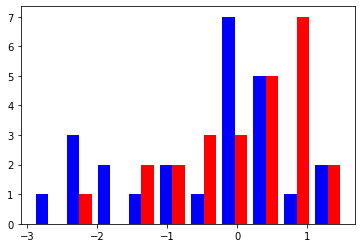

In [163]:
import numpy as np
import matplotlib.pyplot as plt

diff = 0.16 # 0.4 about 95% significance, so 0.16 is the squared difference of significance

src = np.random.normal(0, 1, 25)

dst = np.random.normal(0, 1, 25)

i = 0
while 1:
    print("trying iteration %d"%i)
    if (src.mean()-dst.mean())**2 < diff:
        dst = np.random.normal(0, 1, 25)
    else:
        break
    i += 1
        
plt.hist([src, dst], color=['b', 'r'])
        


We can see we do not need to do many random tests for us to get lucky and find a result that appears to give good seperation but is due to completely random luck. 

# When you're done, submit the notebook

1. **Run all the cells in order.**

2. Submit the notebook by saving it as PDF. 
    * In the cluster environment, it's File | Print (Save as PDF) and submit to [Gradescope](https://www.gradescope.com/courses/182658)<sup>&dagger;</sup>, 
    * On other versions, it may be File | Download As (PDF) and then submit to [Gradescope](https://www.gradescope.com/courses/182658)<sup>&dagger;</sup>.

<sup>&dagger;</sup>To submit to Gradescope, log into the website, add course 9W7PW3 (if not already added) and submit. The assignment name should match the name of this notebook.

![The end](https://live.staticflickr.com/32/89187454_3ae6aded89_b.jpg)